## Lab 2: Ethical Theories in AI & the Moral Machine Experiment

This week's lab builds upon the foundation of exploring different ethical theories related to algorithmic decision-making. It presents a simplified illustration of the Moral Machine experiment and its results to connect utilitarianism, deontology, and virtue ethics—with real-world algorithmic decision-making.

We will create a simplified simulation of the Moral Machine experiment to understand how different ethical theories could influence AI decision-making. There are three steps to this process:

1. Simulating moral dilemmas
2. Using Python to calculate the consequences of different decision-making approaches
3. Comparing outcomes through visualizations

We'll start by importing the required packages:

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Simulating Moral Dilemmas
We'll generate a synthetic dataset representing 100 simulated scenarios where an autonomous car faces a decision. Each scenario includes:

- Passengers: Number and attributes of passengers in the car.
- Pedestrians: Number and attributes of pedestrians outside the car.
- Action: Decision of whether to "stay on course" or "swerve."

Hint: Attributes (e.g., age, profession, adherence to traffic laws) influence ethical choices.

Let's first generate the dataset:

In [2]:
scenarios = []
for _ in range(100):
    scenario = {
        'passengers': random.randint(1, 5),
        'pedestrians': random.randint(1, 5),
        'passenger_elderly': random.randint(0, 1),
        'pedestrian_elderly': random.randint(0, 1),
        'pedestrian_jaywalker': random.randint(0, 1),
        'action': random.choice(['stay', 'swerve']),
    }
    scenarios.append(scenario)

df = pd.DataFrame(scenarios)

df

,passengers,pedestrians,passenger_elderly,pedestrian_elderly,pedestrian_jaywalker,action
0,5,5,1,1,0,stay
1,1,1,1,1,1,swerve
2,1,1,1,0,0,stay
3,1,4,1,1,0,swerve
4,1,2,1,1,1,stay
...,...,...,...,...,...,...
95,5,2,1,1,1,stay
96,5,5,0,0,1,swerve
97,2,1,1,0,1,stay
98,2,1,0,1,0,stay


Next, we will define the set of ethical theories, which will serve as our decision-making models:
- Utilitarianism: Choose the action that minimizes total harm (e.g., prioritize saving more lives).
- Deontology: Follow fixed rules (e.g., never harm pedestrians unless they are jaywalking).
- Virtue Ethics: Make decisions based on character traits (e.g., prioritize saving the law-abiding).

In [3]:
def utilitarian_decision(row):
    """Minimize harm by saving more lives."""
    if row['passengers'] > row['pedestrians']:
        return 'stay'
    return 'swerve'

def deontological_decision(row):
    """Prioritize rules, penalizing jaywalkers."""
    if row['pedestrian_jaywalker']:
        return 'stay'
    return 'swerve'

def virtue_ethics_decision(row):
    """Favor elderly and law-abiding individuals."""
    if row['pedestrian_elderly'] > row['passenger_elderly']:
        return 'swerve'
    return 'stay'

### Step 2: Using Python to calculate the consequences of different decision-making approaches

We can now apply these models to the data:

In [4]:
df['utilitarian'] = df.apply(utilitarian_decision, axis=1)
df['deontology'] = df.apply(deontological_decision, axis=1)
df['virtue_ethics'] = df.apply(virtue_ethics_decision, axis=1)

df

,passengers,pedestrians,passenger_elderly,pedestrian_elderly,pedestrian_jaywalker,action,utilitarian,deontology,virtue_ethics
0,5,5,1,1,0,stay,swerve,swerve,stay
1,1,1,1,1,1,swerve,swerve,stay,stay
2,1,1,1,0,0,stay,swerve,swerve,stay
3,1,4,1,1,0,swerve,swerve,swerve,stay
4,1,2,1,1,1,stay,swerve,stay,stay
...,...,...,...,...,...,...,...,...,...
95,5,2,1,1,1,stay,stay,stay,stay
96,5,5,0,0,1,swerve,swerve,stay,stay
97,2,1,1,0,1,stay,stay,stay,stay
98,2,1,0,1,0,stay,stay,swerve,swerve


### Step 3: Comparing outcomes through visualizations

Let's plot a decision comparison to visualize the model outcomes:

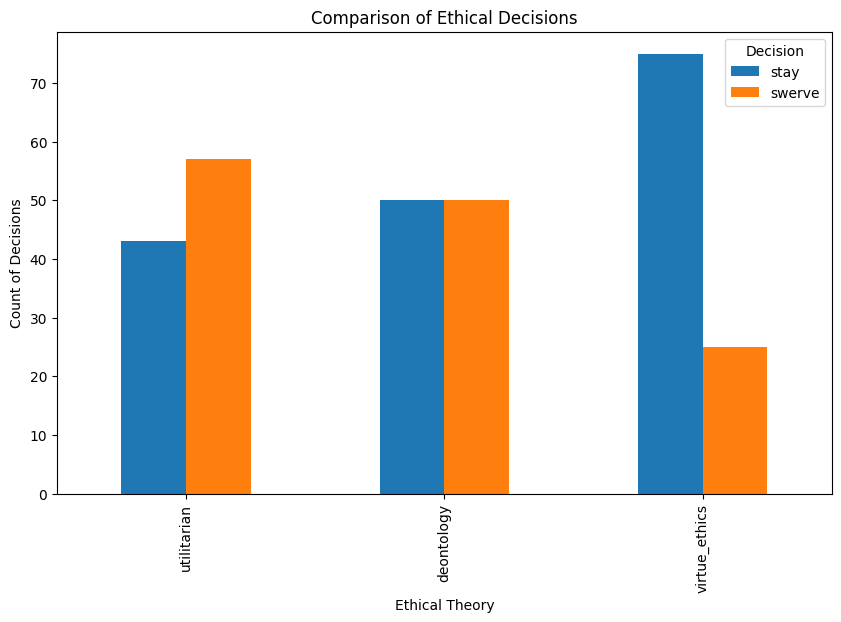

In [5]:
decision_counts = df[['utilitarian', 'deontology', 'virtue_ethics']].apply(pd.Series.value_counts)

decision_counts.T.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Ethical Decisions')
plt.xlabel('Ethical Theory')
plt.ylabel('Count of Decisions')
plt.legend(title='Decision')
plt.show()

We can produce a more granular analysis by focusing on the key attributes in the data to visualize their impact on decision-making:

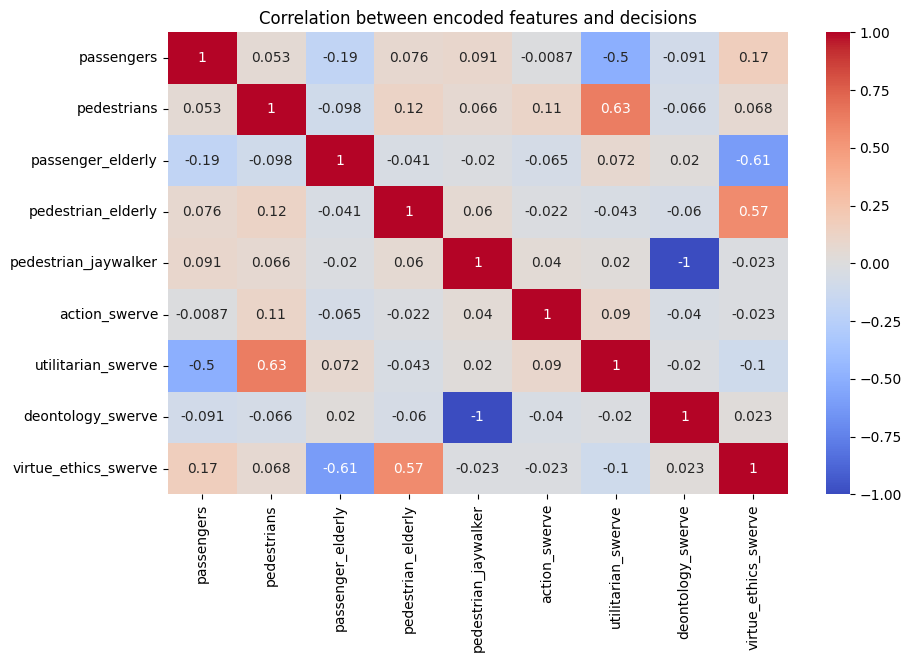

In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation between encoded features and decisions')
plt.show()

When reviewing the results, it may be worthwhile to ask ourselves questions such as:
- Were there scenarios where maximizing lives contradicted moral intuitions?
- Did strict rule-following (e.g., penalizing jaywalkers) lead to ethically dubious outcomes?
- Were decisions favoring certain groups (e.g., elderly) always morally justifiable?

### Your Task

In 1-2 paragraphs:
- analyze one scenario where the ethical theories disagree on the decision.
- discuss the challenges of encoding moral reasoning into AI systems.

Exploring Ethical Conflicts

Imagine an autonomous car that must decide in a split second whether to swerve, endangering one pedestrian, or stay its course, risking several lives. 
Utilitarianism would suggest saving the many outweighs the harm to one, arguing for the greater good. 
On the other hand, deontological ethics would hold firm that it's wrong to cause harm deliberately, no matter the numbers. 
This clash between doing what benefits the most people versus sticking to moral rules illustrates the tricky balance machines must manage, 
raising a key question: Which ethical rule should guide AI decisions?

The Challenge of Teaching Ethics to AI

Programming a machine to make ethical choices is a tough nut to crack. Humans rely on a mix of culture, personal beliefs, and context to make nuanced moral decisions, 
something that's hard to translate into algorithms. For instance, what's considered ethical can vary widely across different societies and can change over time. 
Trying to embed these shifting moral landscapes into AI systems is a daunting task, making it challenging to develop AI that behaves in ways everyone can agree are ethical.